# Set-Up

## Module Importing

The notebook below utilizes both functions imported from established open-source libraries (e.g. pandas, scipy) as well as from a module written for more specific applications herein employed.

In [15]:
import pandas as pd
import scipy.stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import ooc_biosensing_binding_assay_analysis

# Tabulating Data

We begin by defining the path to our working directory, which contains the plate layout and data csv files as well as serves as the output directory for dataframes or figures generated by the code below; we, then, load the layout and data csv files as dataframes.

In [16]:
path = "/Users/vinny/Sync/Main/Research/Project Work/Experimental/Biosensor/Organ-On-Chip Biosensing/Pre-Pilot In-Well Characterization/Phase I/Trial III"

layout = pd.read_csv(path + "/plate_layout.csv")
data = pd.read_csv(path + "/raw_data.csv")

We'll display both the layout and data dataframes to ensure they were loaded without issue and appear as expected.

In [17]:
layout

,Unnamed: 0,1,2,3,4,5,6,7,8,9
0,A,N-Z-0,N-Z-0,N-Z-0,L-Z-0,L-Z-0,L-Z-0,H-Z-0,H-Z-0,H-Z-0
1,B,N-R-1,N-R-1,N-R-1,L-R-1,L-R-1,L-R-1,H-R-1,H-R-1,H-R-1
2,C,N-R-2,N-R-2,N-R-2,L-R-2,L-R-2,L-R-2,H-R-2,H-R-2,H-R-2
3,D,N-R-3,N-R-3,N-R-3,L-R-3,L-R-3,L-R-3,H-R-3,H-R-3,H-R-3
4,E,N-T-1,N-T-1,N-T-1,L-T-1,L-T-1,L-T-1,H-T-1,H-T-1,H-T-1
5,F,N-T-2,N-T-2,N-T-2,L-T-2,L-T-2,L-T-2,H-T-2,H-T-2,H-T-2
6,H,N-T-3,N-T-3,N-T-3,L-T-3,L-T-3,L-T-3,H-T-3,H-T-3,H-T-3
7,G,N-T-4,N-T-4,N-T-4,L-T-4,L-T-4,L-T-4,H-T-4,H-T-4,H-T-4


In [18]:
data

,Unnamed: 0,1,2,3,4,5,6,7,8,9
0,A,0.0028,0.0026,0.0028,0.0026,0.0045,0.0035,0.0037,0.0065,0.0034
1,B,0.0178,0.0176,0.0172,2.0494,1.9706,1.9071,3.1320,3.0706,3.1844
2,C,0.0221,0.0220,0.0234,2.6984,2.5226,2.3929,3.8002,3.7606,3.7503
3,D,0.0275,0.0278,0.0264,2.9380,2.9039,2.6263,3.9026,3.9021,3.9016
4,E,0.0079,0.0066,0.0066,0.4356,0.4026,0.3968,0.8602,0.8632,0.8768
5,F,0.0089,0.0092,0.0094,0.4796,0.4691,0.4452,0.9185,0.9314,0.9935
6,G,0.0163,0.0146,0.0138,0.5232,0.5273,0.4420,0.9956,0.9971,1.0251
7,H,0.0319,0.0309,0.0265,0.5490,0.5568,0.5396,1.0515,1.0470,1.0833


The first row of data points comprises streptavidin-HRP negative controls for the three antigen concentrations; we will, therefore, subtract the mean of each set of negative control samples from the remainder of data points in a given antigen group.  Following this, the negative control streptavidin-HRP row will be dropped from the dataframe as the relevant information will be contained in the remaining data (which will be organized, plotted, and analyzed). 

In [19]:
data.iloc[1:, 1:4] -= data.iloc[0, 1:4].mean()
data.iloc[1:, 4:7] -= data.iloc[0, 4:7].mean()
data.iloc[1:, 7:10] -= data.iloc[0, 7:10].mean()

In [20]:
layout.drop(labels=0, axis=0, inplace=True)
data.drop(labels=0, axis=0, inplace=True)

layout.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)

We will now define the remaining arguments for our assay organization function; specifically the readout parameter (which, in this case, is absorbance or optical density, in arbitrary or procedure-defined units), the experimental identifier (for potential comparison across future experiments), as well as our conditions mapping dictionary (which defines what the hyphen-delimited layout strings refer to in this experiment and is saved as a text file for future reference). 

In [21]:
readout = 'Absorbance (p.d.u.)'
experimental_identifier = 'Pre-Pilot Phase I Trial III'

import json

conditions_mapping = {'N': ("Antigen Concentration (pg/mL)", 0),
                      'L': ("Antigen Concentration (pg/mL)", 500),
                      'H': ("Antigen Concentration (pg/mL)", 2000),
                      'R': ('Streptavidin-HRP Source', 'Original'),
                      'T': ('Streptavidin-HRP Source', 'New'),
                      '1': ('Streptavidin-HRP Concentration (ng/mL)', 11.25),
                      '2': ('Streptavidin-HRP Concentration (ng/mL)', 22.5),
                      '3': ('Streptavidin-HRP Concentration (ng/mL)', 45),
                      '4': ('Streptavidin-HRP Concentration (ng/mL)', 90),
                      }

with open(path+'/conditions_mapping.txt', 'w') as file:
     file.write(json.dumps(conditions_mapping))

In [22]:
organized_data = ooc_biosensing_binding_assay_analysis.categorize_assay_data(layout, data, conditions_mapping, readout, experimental_identifier, path)

We will now display the output dataframe to confirm the organization and tabulation was performed as expected. 

In [23]:
organized_data

,Antigen Concentration (pg/mL),Streptavidin-HRP Source,Streptavidin-HRP Concentration (ng/mL),Absorbance (p.d.u.),Experimental Identifier
0,0,Original,11.25,0.015067,Pre-Pilot Phase I Trial III
1,0,Original,22.50,0.019367,Pre-Pilot Phase I Trial III
2,0,Original,45.00,0.024767,Pre-Pilot Phase I Trial III
3,0,New,11.25,0.005167,Pre-Pilot Phase I Trial III
4,0,New,22.50,0.006167,Pre-Pilot Phase I Trial III
...,...,...,...,...,...
58,2000,Original,45.00,3.897067,Pre-Pilot Phase I Trial III
59,2000,New,11.25,0.872267,Pre-Pilot Phase I Trial III
60,2000,New,22.50,0.988967,Pre-Pilot Phase I Trial III
61,2000,New,45.00,1.020567,Pre-Pilot Phase I Trial III


# Visualizing Data

We will now visualize the data using a seaborn categorical plot (catplot); there are multiple conditions varied that we are concerned with and need to control for, and they will be segmented through the hue and column arguments of this function.  We will select the streptavidin-HRP source as the condition visualized through hue, as that is the parameter of chief concern and the one that will benefit most from being visualized as neighboring bars in this plot; the antigen concentration is also of interest, but will be visualized across neighboring plots.  Absorbance is our dependent variable with streptavidin-HRP concentration the independent variable within each condition. 

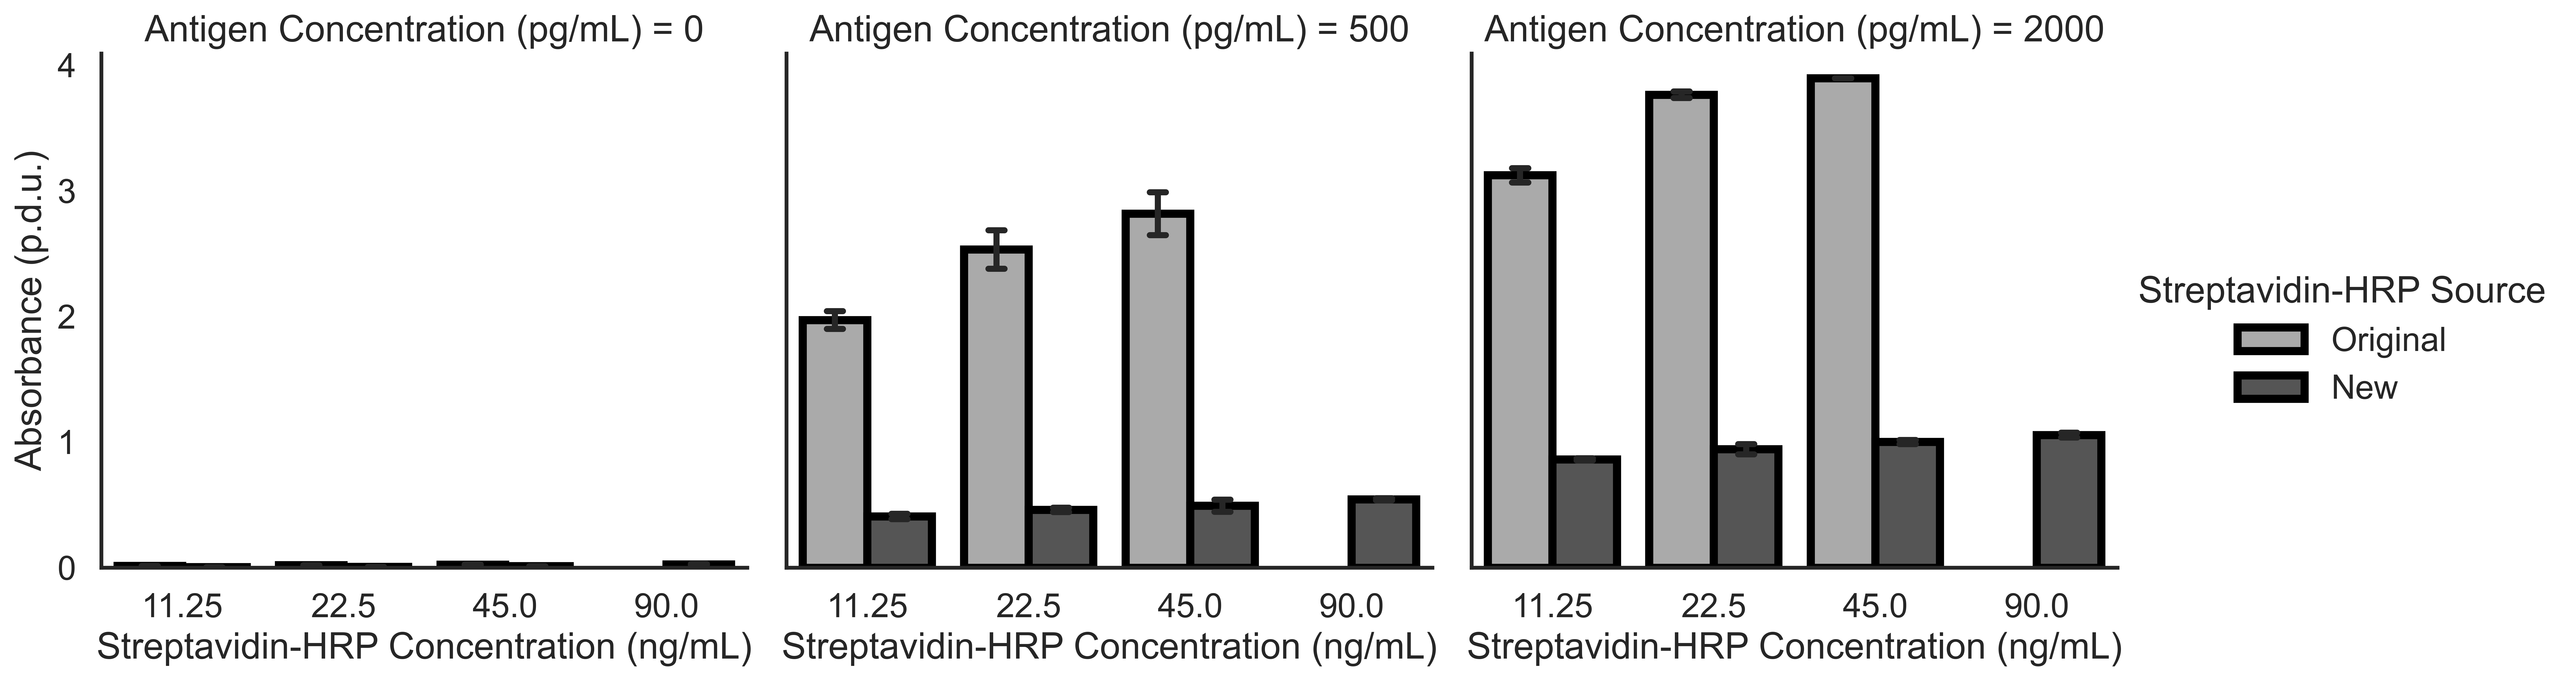

In [24]:
sns.set_theme(style='white', context='talk')
sns.catplot(kind='bar', data=organized_data, 
            x = 'Streptavidin-HRP Concentration (ng/mL)', y = 'Absorbance (p.d.u.)', hue='Streptavidin-HRP Source', col='Antigen Concentration (pg/mL)', 
            errorbar='sd', palette = 'binary', errcolor='.15', errwidth=3, capsize=.1, edgecolor="0", linewidth=4)
plt.savefig(path+'/Figure.svg')

In this particular experiment, there was one concentration condition in the 'new' streptavidin-HRP group that did not have a matched pair in the 'original' streptavidin-HRP group (a decision made due to constrains on the number of available wells); of chief concern was the relative performance of the two protein sources, and of secondary concern was assessment of concentration dependence of streptavidin-HRP on endpoint signal -- both of which are easily visualized without the 90 ng/mL concentration.  A second plot excluding this condition will, therefore, be created to minimize the potential confusion created by it by filtering the dataframe via boolean indexing. 

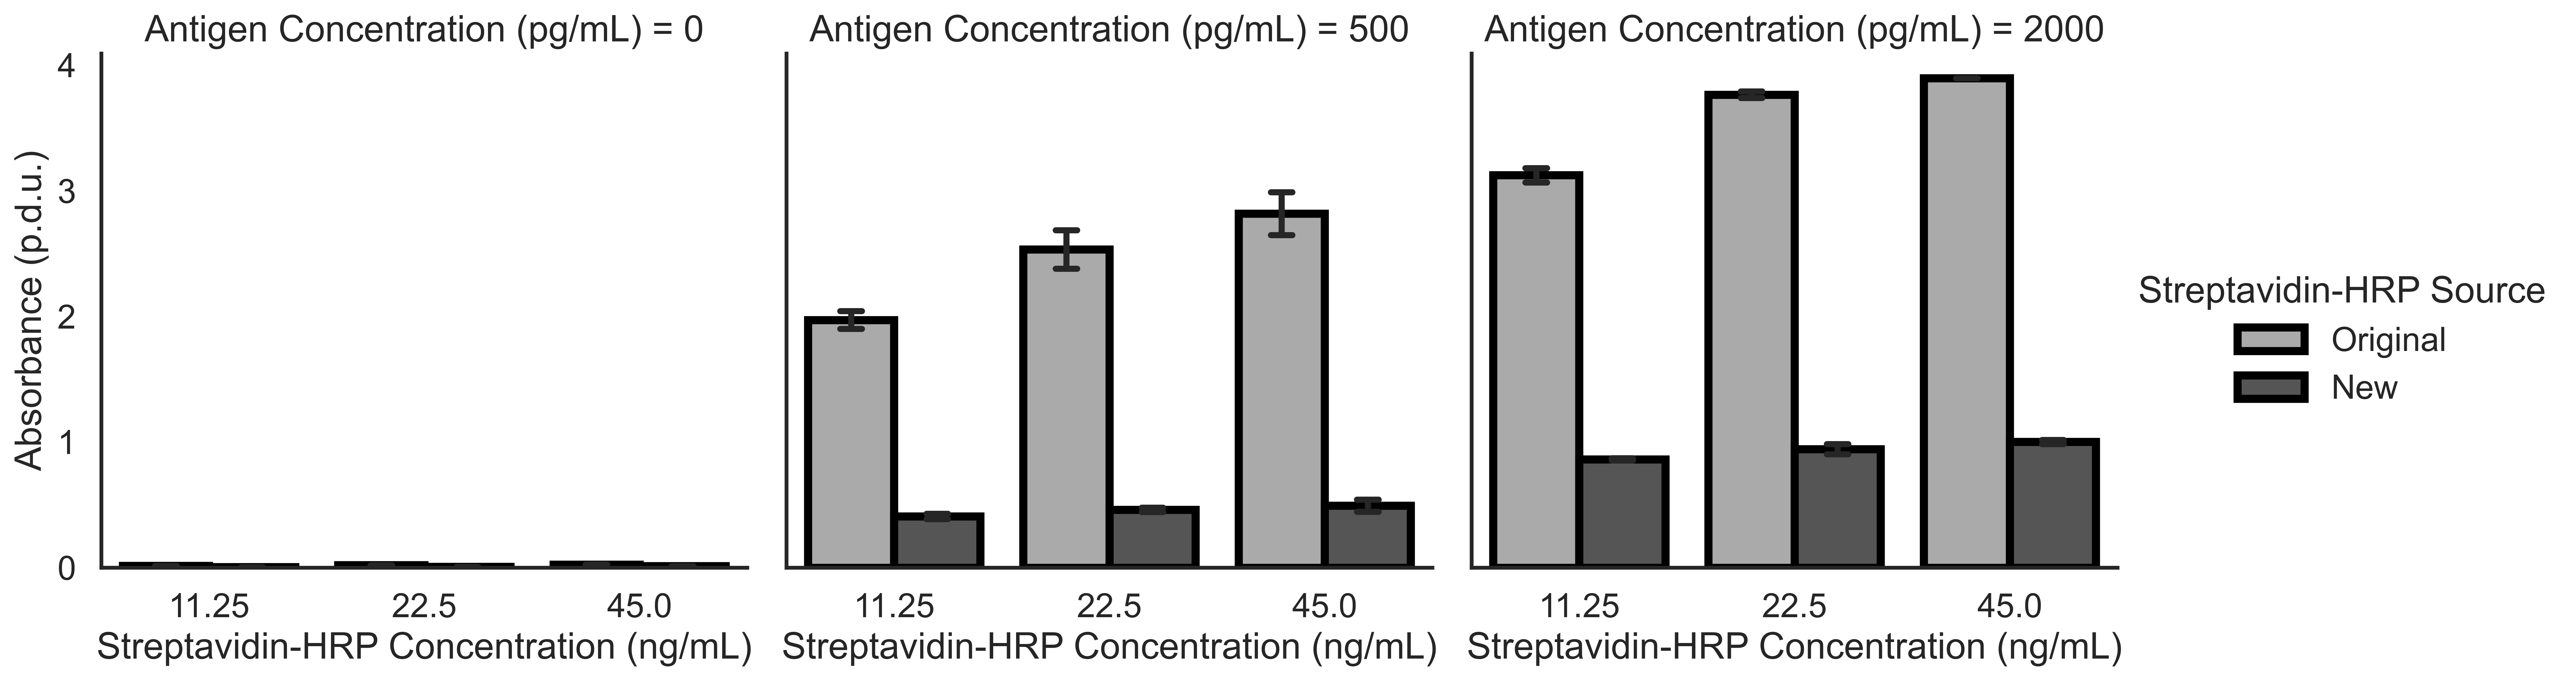

In [25]:
sns.set_theme(style='white', context='talk')
sns.catplot(kind='bar', data=organized_data[organized_data['Streptavidin-HRP Concentration (ng/mL)'] != 90], 
            x = 'Streptavidin-HRP Concentration (ng/mL)', y = 'Absorbance (p.d.u.)', hue='Streptavidin-HRP Source', col='Antigen Concentration (pg/mL)', 
            errorbar='sd', palette = 'binary', errcolor='.15', errwidth=3, capsize=.1, edgecolor="0", linewidth=4)
plt.savefig(path+'/Figure_Remove_90.svg')

# Analyzing Data

The following flow chart provides a general guide that may inform the choice of statistical test in a particular scenario; we will use multiple tests listed in this flow chart later in this notebook.

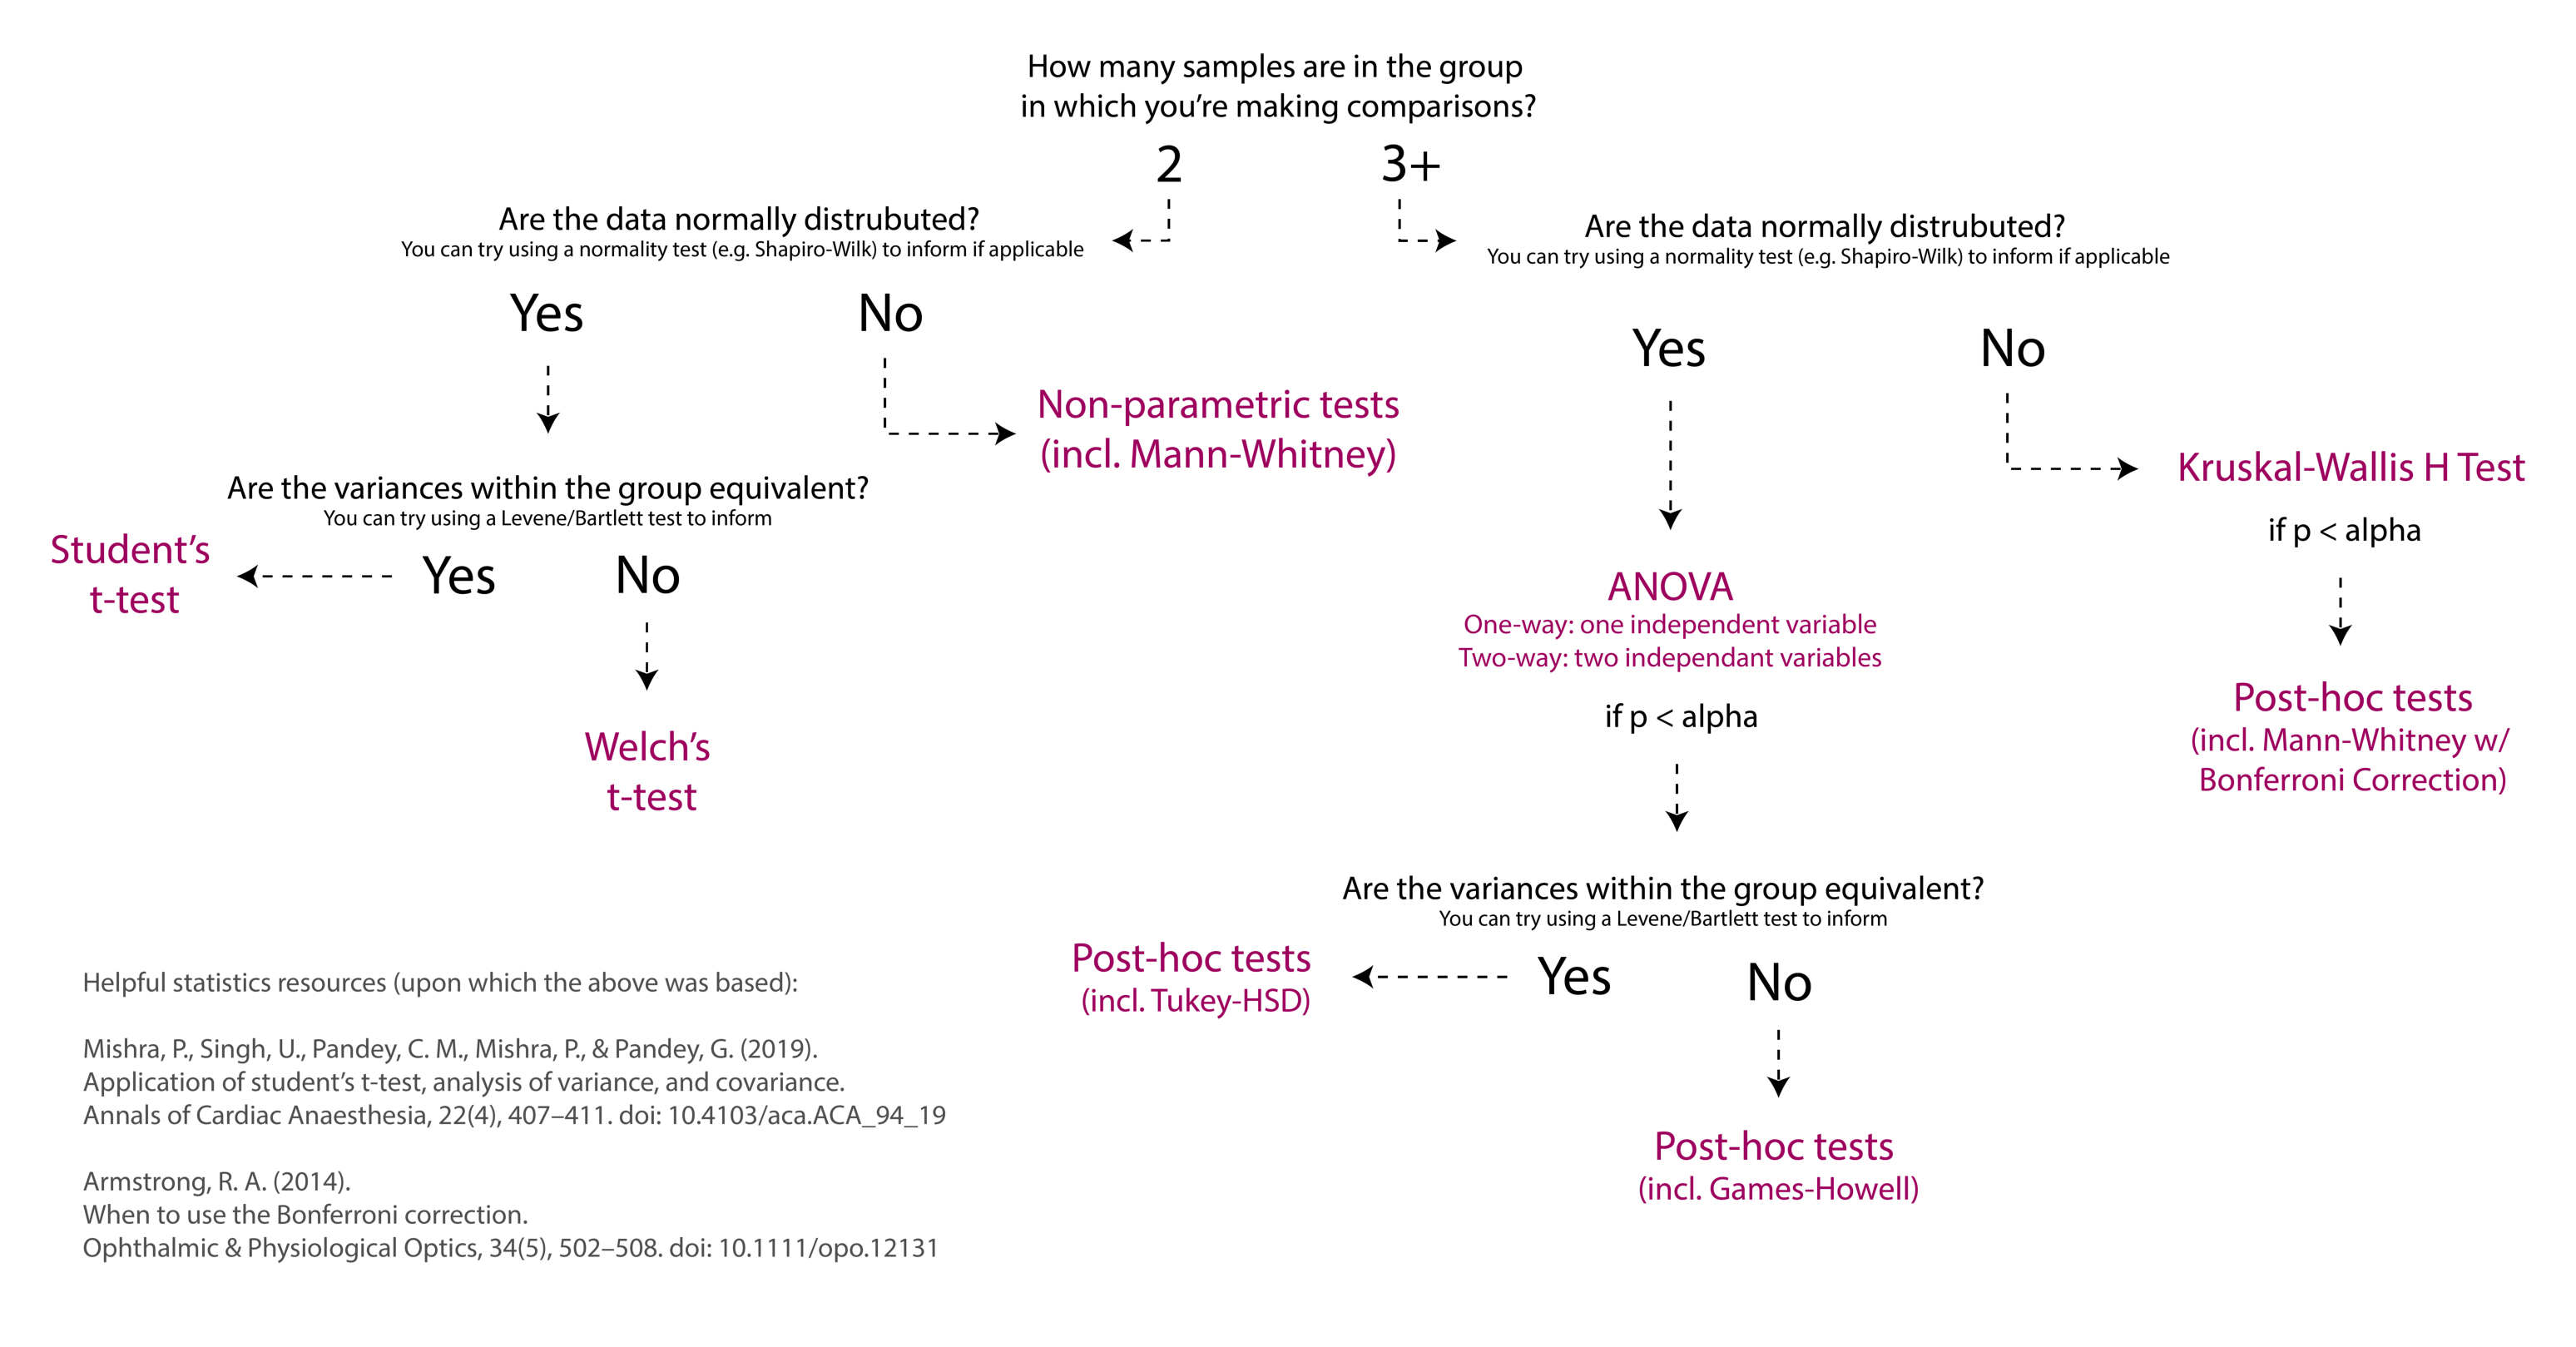

In [26]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
plt.imshow(plt.imread(path+'/Statistical Testing Flowchart.png'))
plt.axis('off')
plt.show()

Now that the data has been visualized, let us quantitatively analyze it for comment on the questions this assay aims to answer: firstly, whether there is a significant difference between the performance of the two streptavidin-HRP proteins and, secondly, whether there is significant dependence between streptavidin-HRP concentration across the tested range and endpoint signal.  

The former question can be informed by a statistical test comparing the signal associated with old and new source of streptavidin-HRP at a given concentration; a t-test may be indicated here, under the assumption the data is normally distributed.  We can inform the decision of whether to use a homoscedastic or heteroscedastic test by first performing Barlett's test. 

The latter question can be informed by a one-way ANOVA; further interrogation can be performed, if applicable, using a post-hoc test (e.g. Tukey's). 

For the first question, we need to obtain separate arrays composed of the data points we will be comparing; let us start with the condition in which the difference appears visually, based on the plot above, to be the least apparent in a non-zero antigen group: [antigen] = 500 pg/mL & [streptavidin-HRP] = 11.25.  This can be done by filtering the dataframe via boolean indexing and storing the absorbances associated with the desired subset into a separate array, which can be fed into Scipy statistical testing functions.

In [27]:
original_500ab_11sa = organized_data[(organized_data['Antigen Concentration (pg/mL)'] == 500) & 
                                     (organized_data['Streptavidin-HRP Concentration (ng/mL)'] == 11.25) & 
                                     (organized_data['Streptavidin-HRP Source'] == 'Original')]['Absorbance (p.d.u.)']

new_500ab_11sa = organized_data[(organized_data['Antigen Concentration (pg/mL)'] == 500) & 
                                (organized_data['Streptavidin-HRP Concentration (ng/mL)'] == 11.25) & 
                                (organized_data['Streptavidin-HRP Source'] == 'New')]['Absorbance (p.d.u.)']

scipy.stats.bartlett(original_500ab_11sa, 
                     new_500ab_11sa)

BartlettResult(statistic=1.9683825441518423, pvalue=0.16061965048186527)

The pvalue associated with Barlett's test for these groups is above the 5% threshold to reject the null hypothesis (that these samples are drawn populations with equal variances); it is reasonable, therefore, to proceed with a Student's t-test (or a homoscedastic t-test).  There are, however, a number of conditions in which we might compare performance between the two sources of streptavidin-HRP; three in the 500 pg/mL antigen group and three in the 2000 pg/mL antigen group.  If we were to perform a t-test for each of these at the 5% significance level, the odds of obtaining a false positive (or Type 1 error) across all comparison increases above our alpha threshold for significance; to compensate for this, we might use the Bonferroni correction to obtain an adjusted alpha and control the 'experiment-wise' error rate.  This adjusted alpha is equal to the ratio of the threshold alpha of 5% and the number of hypotheses we're testing -- which we might define as: a significant difference between the performance of the two proteins exists with an antigen concentration of [500, 2000 pg/mL] and streptavidin-HRP concentration of [11.25, 12.5, 25 ng/mL].   

In [28]:
adjusted_alpha = 0.05/6

t_stat, pvalue = scipy.stats.ttest_ind(original_500ab_11sa, new_500ab_11sa, equal_var=True, alternative='two-sided')

print(pvalue, pvalue < adjusted_alpha)

3.3775642263310363e-06 True


Results from the t-test indicate a pvalue below the adjusted significance threshold, indicating that the null hypothesis (that these samples have been drawn from populations with the same average) should be rejected.  In other words, it appears there is a significant difference between the two streptavidin-HRP proteins in the condition with the lowest apparent difference.  This process can be repeated for other pairs (as, even if the difference appears larger, the dispersion of those groups may be different).

For the second question, we want to look at how signal varies with the concentration of streptavidin-HRP; as such, we will segment our dataframe by antigen concentration and protein source.

In [29]:
original_500_grouped = organized_data[(organized_data['Antigen Concentration (pg/mL)'] == 500) & 
                                      (organized_data['Streptavidin-HRP Source'] == 'Original')].groupby('Streptavidin-HRP Concentration (ng/mL)')['Absorbance (p.d.u.)']

new_500_grouped = organized_data[(organized_data['Antigen Concentration (pg/mL)'] == 500) & 
                                 (organized_data['Streptavidin-HRP Source'] == 'New')].groupby('Streptavidin-HRP Concentration (ng/mL)')['Absorbance (p.d.u.)']

To assess whether the concentration of streptavidin-HRP exerts a significant effect on signal, we can perform a one-way ANOVA on data controlled for protein source and antigen concentration; one of the assumptions underlying this test, however, is normality of distribution.  Before the ANOVA, therefore, we will perform Bartlett's test to assess the validity of this assumption for the data we are analyzing.

In [30]:
scipy.stats.bartlett(original_500_grouped.get_group(11.25), original_500_grouped.get_group(22.5), original_500_grouped.get_group(45))

BartlettResult(statistic=1.1748609335848388, pvalue=0.5557534786420997)

Since the pvalue does not indicate rejection of the null hypothesis, it appears reasonable to proceed to a one-way ANOVA (if we did reject the hypothesis, we might apply a non-parametric test, such as a Kruskal-Wallis)

In [31]:
scipy.stats.f_oneway(original_500_grouped.get_group(11.25), original_500_grouped.get_group(22.5), original_500_grouped.get_group(45))

F_onewayResult(statistic=28.9173602591552, pvalue=0.0008303914469368202)

The ANOVA indicates that there are likely significant differences across the group; in order to assess where these differences are, we can proceed to a post-hoc Tukey test.

In [32]:
print(scipy.stats.tukey_hsd(original_500_grouped.get_group(11.25), original_500_grouped.get_group(22.5), original_500_grouped.get_group(45)))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.562     0.006    -0.910    -0.214
 (0 - 2)     -0.847     0.001    -1.195    -0.499
 (1 - 0)      0.562     0.006     0.214     0.910
 (1 - 2)     -0.285     0.101    -0.633     0.063
 (2 - 0)      0.847     0.001     0.499     1.195
 (2 - 1)      0.285     0.101    -0.063     0.633



The post-hoc test indicates there are significant differences between groups 0 and 2, or the 11.25 and 45 ng/mL streptavidin-HRP concentrations (of the original protein source and with 500 pg/mL antigen concentration).

We will now repeat the process for the new source of streptavidin-HRP.

In [33]:
scipy.stats.bartlett(new_500_grouped.get_group(11.25), new_500_grouped.get_group(22.5), new_500_grouped.get_group(45), new_500_grouped.get_group(90))

BartlettResult(statistic=4.60912563993869, pvalue=0.20276063440726383)

In [34]:
scipy.stats.f_oneway(new_500_grouped.get_group(11.25), new_500_grouped.get_group(22.5), new_500_grouped.get_group(45), new_500_grouped.get_group(90))

F_onewayResult(statistic=12.619738621255818, pvalue=0.002113763535334745)

In [35]:
print(scipy.stats.tukey_hsd(new_500_grouped.get_group(11.25), new_500_grouped.get_group(22.5), new_500_grouped.get_group(45), new_500_grouped.get_group(90)))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.053     0.173    -0.126     0.020
 (0 - 2)     -0.086     0.023    -0.159    -0.013
 (0 - 3)     -0.137     0.001    -0.210    -0.064
 (1 - 0)      0.053     0.173    -0.020     0.126
 (1 - 2)     -0.033     0.513    -0.106     0.040
 (1 - 3)     -0.084     0.026    -0.157    -0.011
 (2 - 0)      0.086     0.023     0.013     0.159
 (2 - 1)      0.033     0.513    -0.040     0.106
 (2 - 3)     -0.051     0.195    -0.124     0.022
 (3 - 0)      0.137     0.001     0.064     0.210
 (3 - 1)      0.084     0.026     0.011     0.157
 (3 - 2)      0.051     0.195    -0.022     0.124



Finally, we can summarize our data, hierarchically grouped by the different categorical variables present and save the results to a csv.

In [36]:
organized_data.groupby(['Antigen Concentration (pg/mL)', 'Streptavidin-HRP Source', 'Streptavidin-HRP Concentration (ng/mL)']).describe().to_csv(path + '/Data_Summary.csv')